# BIG MART SALES PREDICTION

Import dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRFRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor,GradientBoostingRegressor
from sklearn.svm import SVR

Data collection and Analysis

In [2]:
train=pd.read_csv("Train.csv")
test=pd.read_csv("Test.csv")

In [3]:
#lets first merge the train and test data for Exploratory Data Analysis
train['source'] = 'train'
test['source'] = 'test'
test['Item_Outlet_Sales'] = 0
data = pd.concat([train, test], sort = False)
print(train.shape, test.shape, data.shape)

(10000, 13) (5681, 13) (15681, 25)


In [4]:
#no of features and datapoints
data.shape

(15681, 25)

In [5]:
#getting some information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15681 entries, 0 to 5680
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Severity                   10000 non-null  object 
 1   Safety_Score               10000 non-null  float64
 2   Days_Since_Inspection      10000 non-null  float64
 3   Total_Safety_Complaints    10000 non-null  float64
 4   Control_Metric             10000 non-null  float64
 5   Turbulence_In_gforces      10000 non-null  float64
 6   Cabin_Temperature          10000 non-null  float64
 7   Accident_Type_Code         10000 non-null  float64
 8   Max_Elevation              10000 non-null  float64
 9   Violations                 10000 non-null  float64
 10  Adverse_Weather_Metric     10000 non-null  float64
 11  Accident_ID                10000 non-null  float64
 12  source                     15681 non-null  object 
 13  Item_Identifier            5681 non-null   obje

In [6]:
#categorical features and numerical features

In [7]:
data_cat=[col for col in data.columns if data.dtypes[col]=="object"]
data_cat

['Severity',
 'source',
 'Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [8]:
data_num=[col for col in data.columns if data.dtypes[col]!="object"]
data_num
          

['Safety_Score',
 'Days_Since_Inspection',
 'Total_Safety_Complaints',
 'Control_Metric',
 'Turbulence_In_gforces',
 'Cabin_Temperature',
 'Accident_Type_Code',
 'Max_Elevation',
 'Violations',
 'Adverse_Weather_Metric',
 'Accident_ID',
 'Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [9]:
#checking for missing values
data.isna().sum()

Severity                      5681
Safety_Score                  5681
Days_Since_Inspection         5681
Total_Safety_Complaints       5681
Control_Metric                5681
Turbulence_In_gforces         5681
Cabin_Temperature             5681
Accident_Type_Code            5681
Max_Elevation                 5681
Violations                    5681
Adverse_Weather_Metric        5681
Accident_ID                   5681
source                           0
Item_Identifier              10000
Item_Weight                  10976
Item_Fat_Content             10000
Item_Visibility              10000
Item_Type                    10000
Item_MRP                     10000
Outlet_Identifier            10000
Outlet_Establishment_Year    10000
Outlet_Size                  11606
Outlet_Location_Type         10000
Outlet_Type                  10000
Item_Outlet_Sales            10000
dtype: int64

In [10]:
#percentage of missing values
data.isna().sum()/data.shape[0]*100

Severity                     36.228557
Safety_Score                 36.228557
Days_Since_Inspection        36.228557
Total_Safety_Complaints      36.228557
Control_Metric               36.228557
Turbulence_In_gforces        36.228557
Cabin_Temperature            36.228557
Accident_Type_Code           36.228557
Max_Elevation                36.228557
Violations                   36.228557
Adverse_Weather_Metric       36.228557
Accident_ID                  36.228557
source                        0.000000
Item_Identifier              63.771443
Item_Weight                  69.995536
Item_Fat_Content             63.771443
Item_Visibility              63.771443
Item_Type                    63.771443
Item_MRP                     63.771443
Outlet_Identifier            63.771443
Outlet_Establishment_Year    63.771443
Outlet_Size                  74.013137
Outlet_Location_Type         63.771443
Outlet_Type                  63.771443
Item_Outlet_Sales            63.771443
dtype: float64

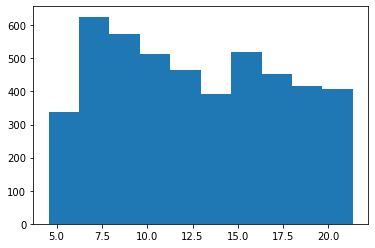

In [11]:
#Handling issing values
plt.hist(data["Item_Weight"])
plt.show()

In [12]:
data["Item_Weight"]=data["Item_Weight"].fillna(data["Item_Weight"].mean())

In [13]:
data["Outlet_Size"]=data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0])

In [14]:
data.isna().sum()

Severity                      5681
Safety_Score                  5681
Days_Since_Inspection         5681
Total_Safety_Complaints       5681
Control_Metric                5681
Turbulence_In_gforces         5681
Cabin_Temperature             5681
Accident_Type_Code            5681
Max_Elevation                 5681
Violations                    5681
Adverse_Weather_Metric        5681
Accident_ID                   5681
source                           0
Item_Identifier              10000
Item_Weight                      0
Item_Fat_Content             10000
Item_Visibility              10000
Item_Type                    10000
Item_MRP                     10000
Outlet_Identifier            10000
Outlet_Establishment_Year    10000
Outlet_Size                      0
Outlet_Location_Type         10000
Outlet_Type                  10000
Item_Outlet_Sales            10000
dtype: int64

# Data analysis

In [15]:
data.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,15681.000000,5681.000000,5681.000000,5681.000000,5681.0
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635,6266.554200,12.695633,0.065684,141.023273,1997.828903,0.0
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128,3610.170288,2.555043,0.051252,61.809091,8.372256,0.0
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316,2.000000,4.555000,0.000000,31.990000,1985.000000,0.0
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063,3139.750000,12.695633,0.027047,94.412000,1987.000000,0.0
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467,6280.500000,12.695633,0.054154,141.415400,1999.000000,0.0
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059,9391.500000,12.695633,0.093463,186.026600,2004.000000,0.0
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378,12500.000000,21.350000,0.323637,266.588400,2009.000000,0.0


In [16]:
 #Eda of numerical features 

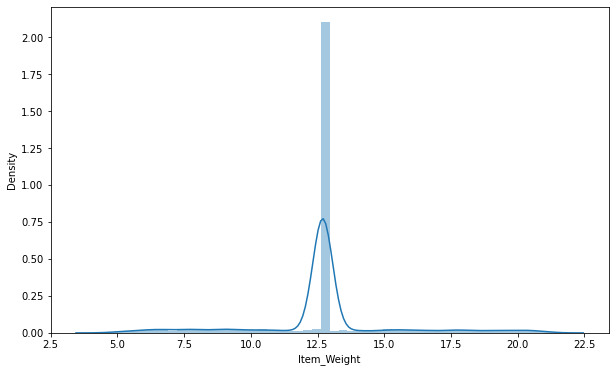

In [17]:
#Item weight distribution
plt.figure(figsize=(10,6))
sns.distplot(data["Item_Weight"])
plt.show()

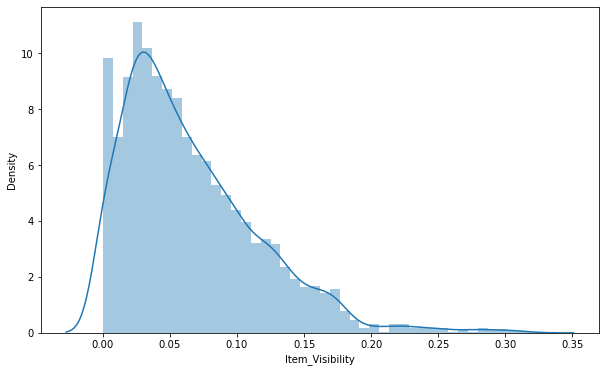

In [18]:
#Item_Visibility distribution
plt.figure(figsize=(10,6))
sns.distplot(data["Item_Visibility"])
plt.show()

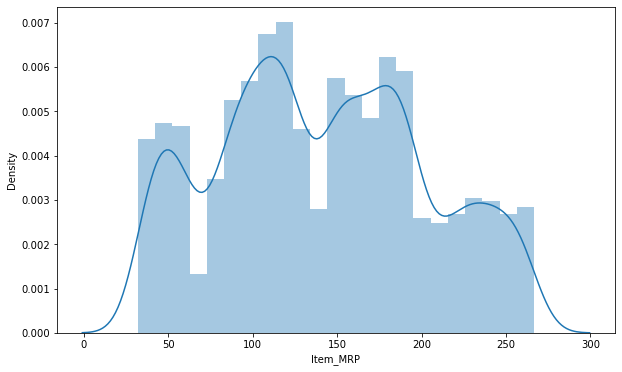

In [19]:
#Item_MRP distribution
plt.figure(figsize=(10,6))
sns.distplot(data["Item_MRP"])
plt.show()

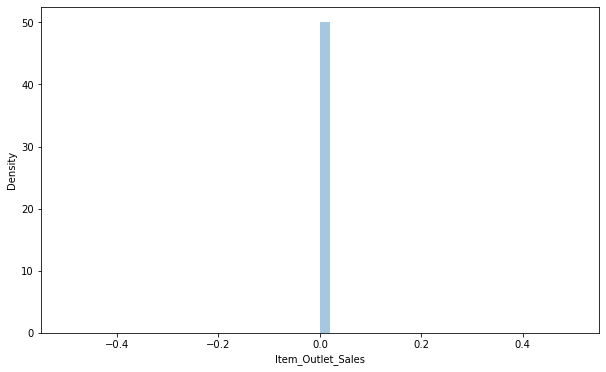

In [20]:
#Item_Outlet_Sales distribution
plt.figure(figsize=(10,6))
sns.distplot(data["Item_Outlet_Sales"])
plt.show()

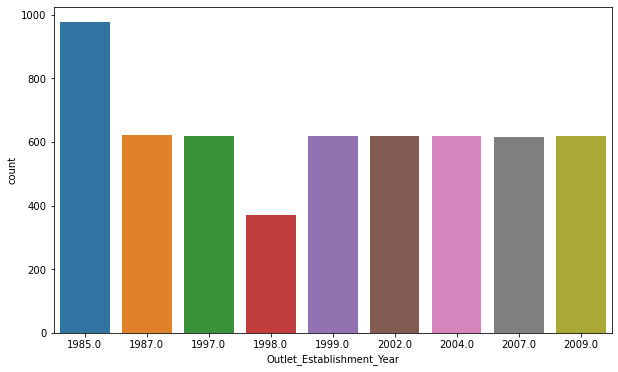

In [21]:
#Outlet_Establishment_Year
plt.figure(figsize=(10,6))
sns.countplot(data["Outlet_Establishment_Year"])
#sns.countplot(x="Outlet_Establishment_Year",data=data)
plt.show()

In [22]:
#categorical data analysis

In [23]:
data_cat

['Severity',
 'source',
 'Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

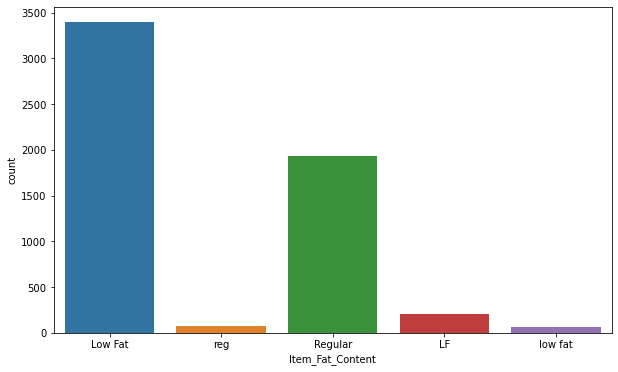

In [24]:
#Item_Fat_Content
plt.figure(figsize=(10,6))
sns.countplot(data["Item_Fat_Content"])
plt.show()

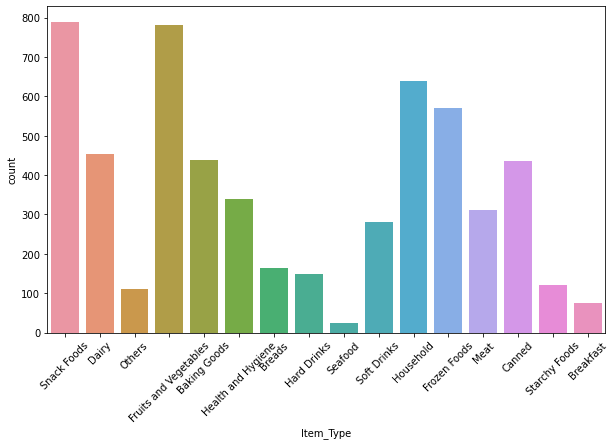

In [25]:
#Item_Type
plt.figure(figsize=(10,6))
sns.countplot(data["Item_Type"])
plt.xticks(rotation=45)
plt.show()

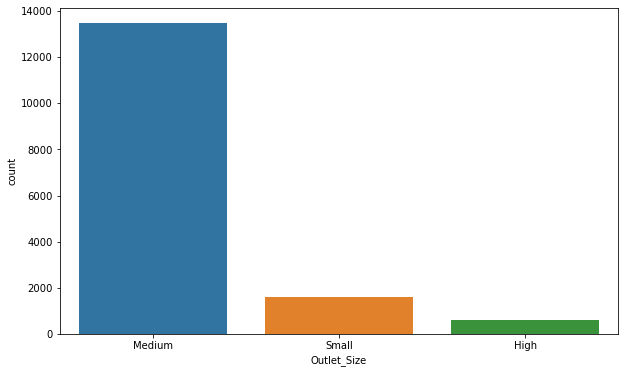

In [26]:
#Outlet_Size
plt.figure(figsize=(10,6))
sns.countplot(data["Outlet_Size"])
plt.show()

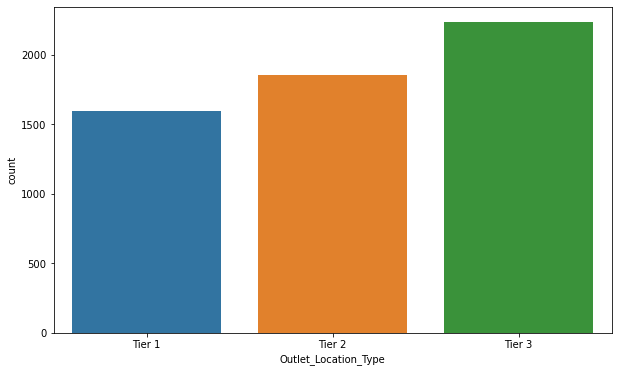

In [27]:
#Outlet_Location_Type
plt.figure(figsize=(10,6))
sns.countplot(data["Outlet_Location_Type"])
plt.show()

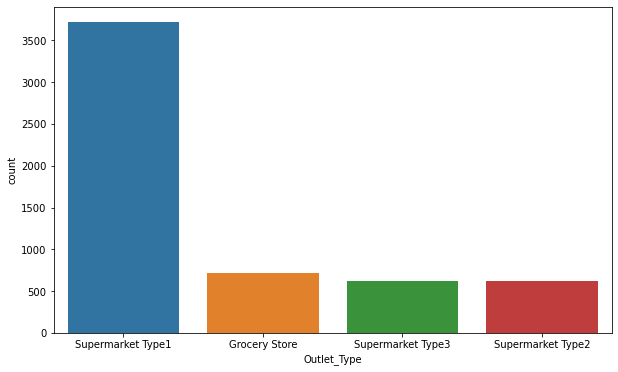

In [28]:
#Outlet_Type
plt.figure(figsize=(10,6))
sns.countplot(data["Outlet_Type"])
plt.show()

Data Preprocessing

In [29]:
#cleaning Item_Fat_Content
data["Item_Fat_Content"].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [30]:
data.replace({"Item_Fat_Content":{"low fat": "Low Fat", "LF":"Low Fat"}},inplace=True)
data.replace({"Item_Fat_Content":{"reg":"Regular"}},inplace=True)

In [31]:
#label encoding
lr=LabelEncoder()
data_cat

['Severity',
 'source',
 'Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [32]:
data["Item_Identifier"]=lr.fit_transform(data["Item_Identifier"])
data["Item_Fat_Content"]=lr.fit_transform(data["Item_Fat_Content"])
data["Item_Type"]=lr.fit_transform(data["Item_Type"])
data["Outlet_Identifier"]=lr.fit_transform(data["Outlet_Identifier"])
data["Outlet_Size"]=lr.fit_transform(data["Outlet_Size"])
data["Outlet_Location_Type"]=lr.fit_transform(data["Outlet_Location_Type"])
data["Outlet_Type"]=lr.fit_transform(data["Outlet_Type"])

In [33]:
data.head(2)

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,...,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Minor_Damage_And_Injuries,49.223744,14.0,22.0,71.285324,0.272118,78.04,2.0,31335.476824,3.0,...,2,NaN,16,NaN,10,NaN,1,3,4,NaN
1,Minor_Damage_And_Injuries,62.465753,10.0,27.0,72.288058,0.423939,84.54,2.0,26024.711057,2.0,...,2,NaN,16,NaN,10,NaN,1,3,4,NaN


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15681 entries, 0 to 5680
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Severity                   10000 non-null  object 
 1   Safety_Score               10000 non-null  float64
 2   Days_Since_Inspection      10000 non-null  float64
 3   Total_Safety_Complaints    10000 non-null  float64
 4   Control_Metric             10000 non-null  float64
 5   Turbulence_In_gforces      10000 non-null  float64
 6   Cabin_Temperature          10000 non-null  float64
 7   Accident_Type_Code         10000 non-null  float64
 8   Max_Elevation              10000 non-null  float64
 9   Violations                 10000 non-null  float64
 10  Adverse_Weather_Metric     10000 non-null  float64
 11  Accident_ID                10000 non-null  float64
 12  source                     15681 non-null  object 
 13  Item_Identifier            15681 non-null  int3

Splitting features and targets

In [35]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [36]:
X=train.drop("Item_Outlet_Sales",axis=1)

In [37]:
y=train["Item_Outlet_Sales"]

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X.shape,X_train.shape,X_test.shape)

(10000, 23) (8000, 23) (2000, 23)


# Regression models

In [39]:

models= [("Linear Regression", LinearRegression()),
        ("Lasso", Lasso()),
         ("Ridge", Ridge()),
         ("Knearest neighbor", KNeighborsRegressor()),
         ("Decision tree",DecisionTreeRegressor()),
         ("Random forest", RandomForestRegressor()),
         ("XGboost", XGBRFRegressor()),
         ("Gradient boost",GradientBoostingRegressor()),
         ("Bagging",BaggingRegressor()),
         ("SVM",SVR())     
        ]
for i in models:
    reg=i[1]
    reg.fit(X_train,y_train)
    pred=reg.predict(X_test)
    print(i[0])
    print("R2: ",r2_score(y_test,pred))
    print("MSE:", mean_squared_error(y_test,pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test,pred)))
    print("-"*30)

ValueError: could not convert string to float: 'Significant_Damage_And_Serious_Injuries'

Best Model selection : XGBoost

In [ ]:
#Test the model with Test data
xg=XGBRFRegressor()
xg=xg.fit(X_train,y_train)
y_test_reg=xg.predict(test)

In [ ]:
#Add Item_Identifier, Outlet_Identifier, Item_Outlet_sales to submission.csv file

In [ ]:
test_data=test.drop(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],axis=1)


In [ ]:
y_test=pd.DataFrame(y_test_reg,columns=["Item_Outlet_Sales"])
y_test.shape

In [ ]:
test_data=pd.concat([test_data,y_test],axis=1)
test_data.shape

In [ ]:
test_data.set_index("Item_Identifier",inplace=True)
test_data

In [ ]:
test_data.to_csv("submission.csv")